## 1. Setup

In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import warnings

from utils.data.annotations import *
from utils.data.density_maps import create_and_save_density_maps
from utils.data.data_ops import move_val_split_to_train
from utils.input_output.io import save_np_arrays, load_np_arrays, load_images
from utils.input_output.io import save_gt_counts, load_gt_counts
from utils.preprocessing.misc import gaussian_smoothing

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. Datasets

### 2.1 ShanghaiTech (Part B) Dataset

In [4]:
DATASET_PATH = '../datasets/shanghai_tech/part_b'
TRAIN_PATH = f'{DATASET_PATH}/train'
TRAIN_IMG_PATH = f'{TRAIN_PATH}/images'
TRAIN_GT_DOTS_PATH = f'{TRAIN_PATH}/gt_dots'
TRAIN_GT_COUNTS_PATH = f'{TRAIN_PATH}/gt_counts'
TRAIN_GT_DENSITY_MAPS_PATH = f'{TRAIN_PATH}/gt_density_maps'

In [5]:
print(DATASET_PATH)
print(os.listdir(DATASET_PATH))

../datasets/shanghai_tech/part_b
['test', 'train', 'val']


In [6]:
print(TRAIN_PATH)
print(os.listdir(TRAIN_PATH))

../datasets/shanghai_tech/part_b/train
['gt_counts', 'gt_density_maps', 'gt_density_maps_aug', 'gt_dots', 'gt_dots_mat', 'images', 'images_aug']


#### Load some train images and density maps

In [7]:
train_img_names = ['IMG_78.jpg', 'IMG_154.jpg']
train_images = load_images(TRAIN_IMG_PATH, train_img_names, num_images=2)
print(len(train_images))
print(train_images[0].dtype)

2
float64


#### Load dots images (.png)

In [8]:
train_img_names_png = [img_name.split('.')[0] + '.png' for img_name in train_img_names]
train_dots_images = load_dots_images(TRAIN_GT_DOTS_PATH, train_img_names_png)

print(len(train_dots_images), train_dots_images[0].shape, train_dots_images[0].dtype,
      train_dots_images[0].min(), train_dots_images[0].max(), train_dots_images[0].sum())

2 (768, 1024) float64 0.0 1.0 42.0


#### Create density maps (sigma=10)

In [9]:
SIGMA = 10
train_gt_density_maps = []
for dots_img in train_dots_images:
    density_map = gaussian_smoothing([dots_img], sigma=SIGMA)
    train_gt_density_maps.append(density_map[0])

In [10]:
print(train_gt_density_maps[0].shape)

(768, 1024)


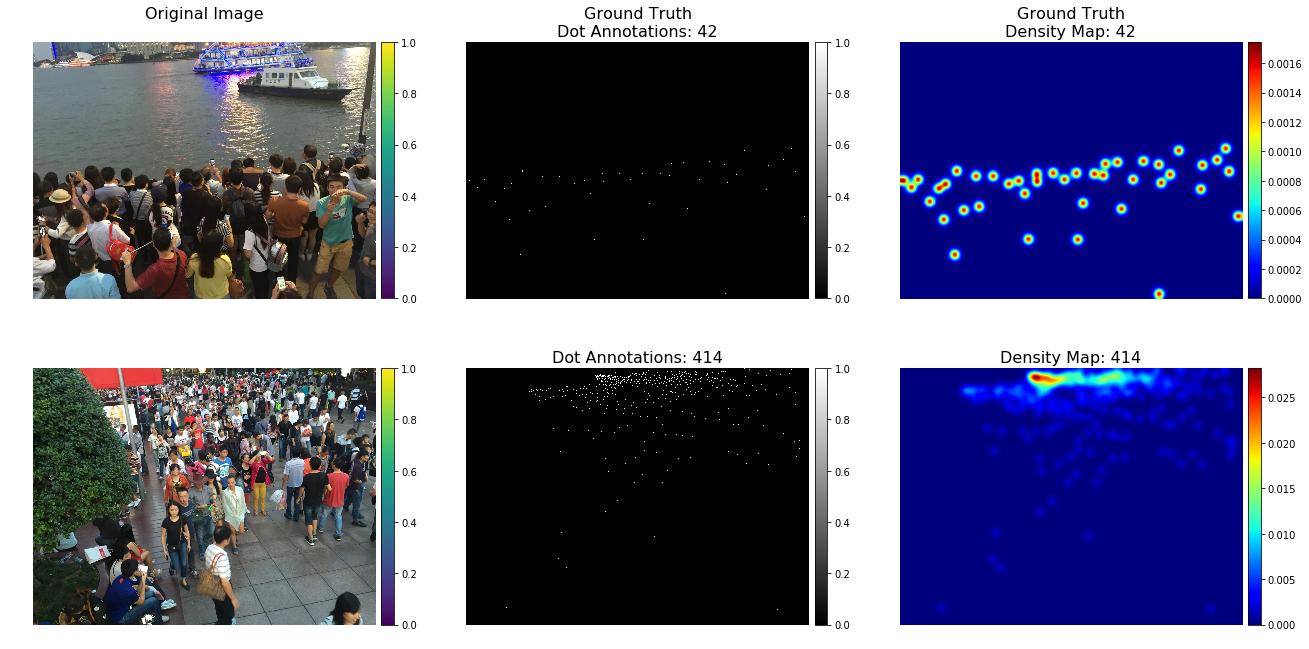

In [11]:
import skimage.morphology

ROWS = 2
COLS = 3
fontsize = 16
fraction = 0.0355
pad = 0.016

plt.figure(figsize=(22, 11))
plt.title('CARPK Dataset')

for i in range(ROWS):
    count = train_dots_images[i].sum().astype(np.int)
    
    plt.subplot(ROWS, COLS, COLS * i + 1)
    if i == 0 :
        plt.title(f'Original Image\n', fontsize=fontsize)
    plt.imshow(train_images[i])
    plt.colorbar(fraction=fraction, pad=pad)
    plt.axis('off')
    
    plt.subplot(ROWS, COLS, COLS * i + 2)
    title = f'Dot Annotations: {count}'
    if i == 0:
        title = 'Ground Truth\n' + title
    plt.title(title, fontsize=fontsize)
    plt.imshow(skimage.morphology.binary_dilation(train_dots_images[i], np.ones((3, 3))).astype(float),
               cmap='gray', interpolation='none')
    plt.colorbar(fraction=fraction, pad=pad)
    plt.axis('off')
    
    plt.subplot(ROWS, COLS, COLS * i + 3)
    title = f'Density Map: {train_gt_density_maps[i].sum():.0f}'
    if i == 0:
        title = 'Ground Truth\n' + title
    plt.title(title, fontsize=fontsize)
    plt.imshow(train_gt_density_maps[i], cmap='jet')
    plt.colorbar(fraction=fraction, pad=pad)
    plt.axis('off')